# **AIN 214 - PA3 - FALL 2024**





BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 29.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/insurance.csv"
---

We will deal with the insurance dataset. This dataset contains data on individual medical insurance costs based on several demographic and personal health factors.

**Features:**


* Age: Age of the individual
* Sex: Gender of the individual
* BMI: Body Mass Index, a measure of body fat based on height and weight
* Children: Number of children/dependents
* Smoker: Whether the individual smokes or not
* Region: Geographical region in the US
* Charges: Medical expenses (target variable for regression)

# **Necessary Imports**

In [511]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [512]:
#Let's get to know the data first
data_frame = pd.read_csv('Data/insurance.csv')
data_frame.drop_duplicates(inplace=True)

regions = data_frame['region'].unique()
max_age = data_frame['age'].max()
min_age = data_frame['age'].min()
max_bmi = data_frame['bmi'].max()
min_bmi = data_frame['bmi'].min()
max_children = data_frame['children'].max()
min_children = data_frame['children'].min()
max_charge = data_frame['charges'].max()
min_charge = data_frame['charges'].min()
print(data_frame.columns)
print("Age Range:", max_age, "-", min_age)
print("BMI Range:", max_bmi, "-", min_bmi)
print("Children Range:", max_children, "-", min_children)
print("Charge Range:", max_charge, "-", min_charge)
print("Regions: ", regions)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Age Range: 64 - 18
BMI Range: 53.13 - 15.96
Children Range: 5 - 0
Charge Range: 63770.42801 - 1121.8739
Regions:  ['southwest' 'southeast' 'northwest' 'northeast']


#### There aren't any null value

In [513]:
data_frame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Gender distribution is uniform and symmetric, there is a small difference, we can say that this data samples US citizens correctly according to the gender. (Gender proportion in 2024 for US; 50.3% male and 49.7% female.)

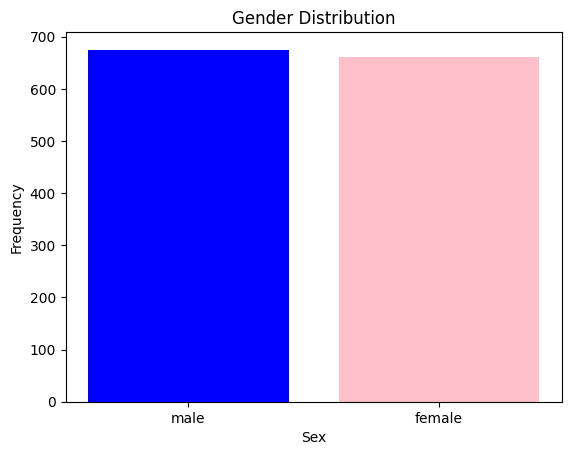

In [514]:
plt.figure()
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Gender Distribution")
plt.bar(x=data_frame["sex"].value_counts().index, height=data_frame["sex"].value_counts().values,
        color=['blue', 'pink'])
plt.show()

#### The ratio of the smokers to the sample size is approximately 1/6

<BarContainer object of 2 artists>

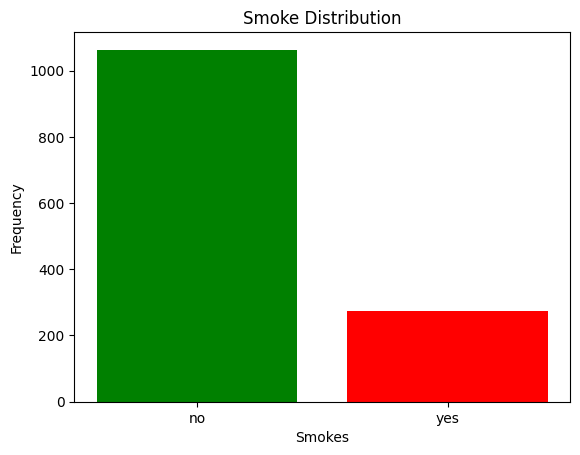

In [515]:
plt.figure()
plt.xlabel("Smokes")
plt.ylabel("Frequency")
plt.title("Smoke Distribution")
plt.bar(x=data_frame["smoker"].value_counts().index, height=data_frame["smoker"].value_counts().values,
        color=['green', 'red'])

#### There are four region values for this dataset and the distribution is almost uniform among these regions.

<BarContainer object of 4 artists>

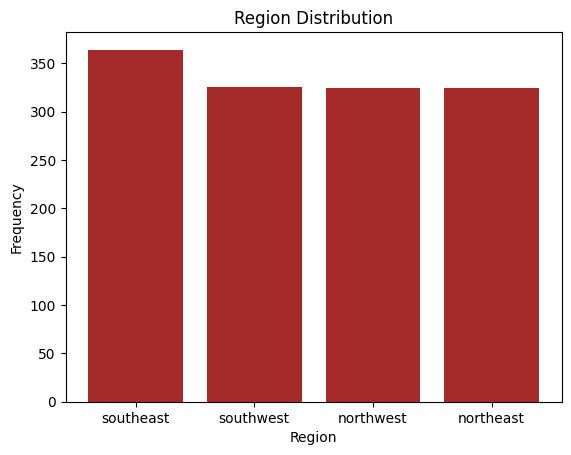

In [516]:
plt.figure()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Region Distribution")
plt.bar(x=data_frame["region"].value_counts().index, height=data_frame["region"].value_counts().values, color="brown")

#### The distribution is right-skewed. There are a few individuals having a significantly higher number of children. Therefore, using median as 'typical' individual in US can better than using mean.

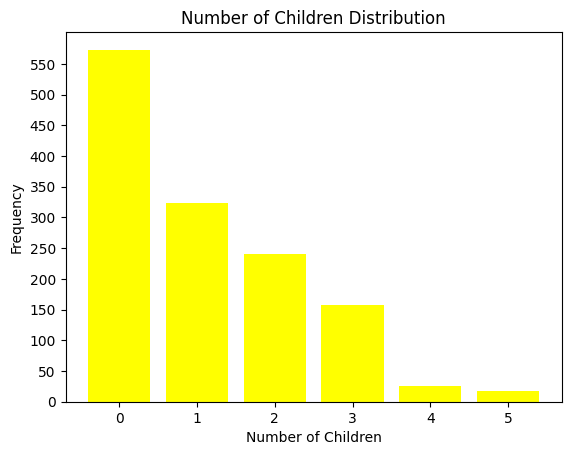

In [517]:
plt.figure()
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.title("Number of Children Distribution")
plt.bar(x=data_frame["children"].value_counts().index, height=data_frame["children"].value_counts().values,
        color="yellow")
plt.yticks(range(0, 600, 50))
plt.show()

#### For the range 23 to 63 the distribution is tending to be uniform, but the first age bin (18 to 23) has a significantly higher frequency than the other bins and the last age bin (63 to 68) has a significantly less frequency than the other bins. We can say that the young adults have participated more and olds have participated less than other age groups in this dataset.


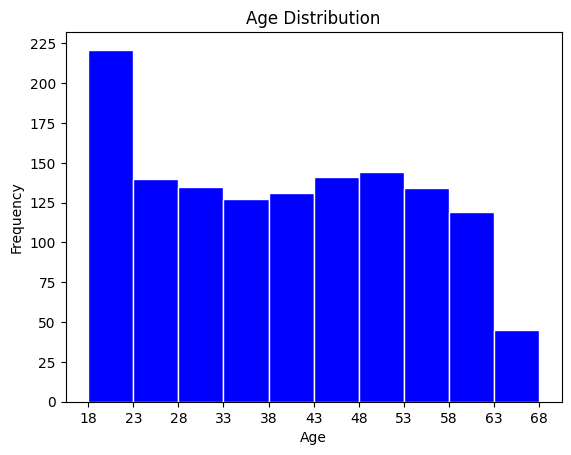

In [518]:
plt.figure()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

bins = range(min_age, max_age + 6, 5)
plt.hist(data_frame["age"], bins=bins, color="blue", edgecolor="white")
plt.xticks(bins)
plt.yticks(range(0, 250, 25))

plt.show()

#### The distribution is clustered around the mean (mean is approximately 30) and formed a bell shape.

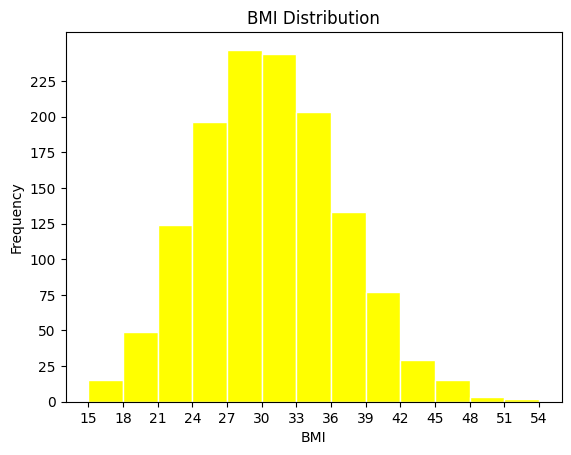

Mean: 30.66345175766642


In [519]:
plt.figure()
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("BMI Distribution")
bins = range(int(min_bmi), int(max_bmi) + 4, 3)
plt.hist(data_frame["bmi"], bins=bins, color="yellow", edgecolor="white")
plt.yticks(range(0, 250, 25))
plt.xticks(bins)
plt.show()

print(f"Mean: {data_frame['bmi'].mean()}")

#### The distribution is extremely right-skewed. The data is clustered on the left side of the graph meaning the most of the subjects has been charged less than 21k.

<function matplotlib.pyplot.show(close=None, block=None)>

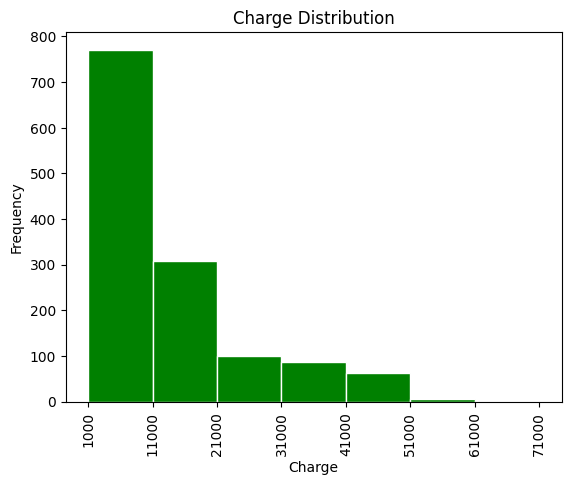

In [520]:
plt.figure()
plt.xlabel("Charge")
plt.ylabel("Frequency")
plt.title("Charge Distribution")

bins = range(int(min_charge) // 1000 * 1000, int(max_charge) + 10001, 10000)
plt.hist(data_frame["charges"], bins=bins, color="green", edgecolor="white")
plt.yticks()
plt.xticks(bins, rotation=90)
plt.show


#### The 'typical' charge for both genders is approximately 10k. The inter quartile range for both genders lays down between 5k to 20k. There arent surprising charges(outliers) until first quartile and after the third quartile, there are plenty of outliers again for both genders. Because of there are plenty of outliers, using median is more likely to give a better result and medians say gender is not one of the major factors affecting charges.

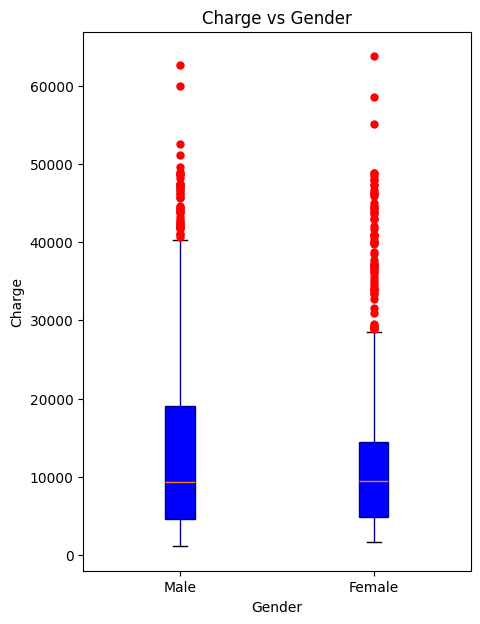

In [521]:
male_charges = data_frame[data_frame['sex'] == 'male']['charges']
female_charges = data_frame[data_frame['sex'] == 'female']['charges']

plt.figure(figsize=(5, 7))
plt.xlabel("Gender")
plt.ylabel("Charge")
plt.title("Charge vs Gender")

plt.boxplot([male_charges, female_charges], tick_labels=['Male', 'Female'], patch_artist=True,
            boxprops=dict(facecolor='blue', color='darkblue'),
            whiskerprops=dict(color='darkblue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5, markeredgecolor="red"))

plt.show()

#### The 'typical' charge for a non-smoker is approximately 7.5k where the 'typical' charge for a smoker is approximately 35k. That means smoking is generally increases cost of the insurance more then 4 times. Even the ones who have the greatest charges among non-smokers are paying almost the same amount with a 'typical' smoker. Additionally ones who have the least charges among smokers are paying more than 75% of the non-smokers. In conclusion, smoking has a significant effect on the insurance charges.

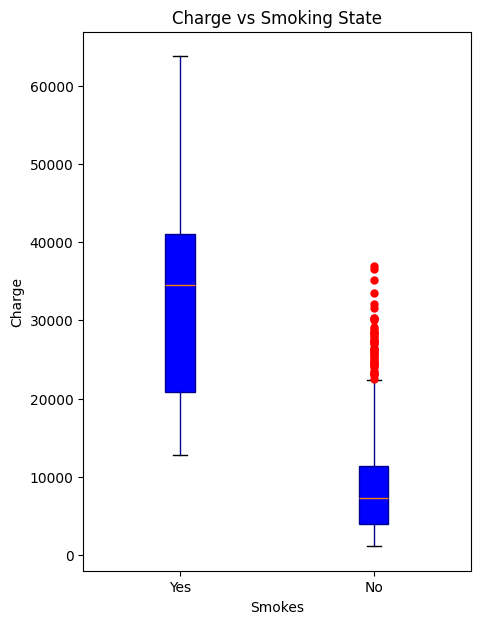

Smokers' median: 34456,        Non-Smokers' median: 7345


In [522]:
yes_charges = data_frame[data_frame['smoker'] == 'yes']['charges']
no_charges = data_frame[data_frame['smoker'] == 'no']['charges']

plt.figure(figsize=(5, 7))
plt.xlabel("Smokes")
plt.ylabel("Charge")
plt.title("Charge vs Smoking State")

plt.boxplot([yes_charges, no_charges], tick_labels=['Yes', 'No'], patch_artist=True,
            boxprops=dict(facecolor='blue', color='darkblue'),
            whiskerprops=dict(color='darkblue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5, markeredgecolor="red"))

plt.show()

print(f"Smokers' median: {int(yes_charges.median())},        Non-Smokers' median: {int(no_charges.median())}")

#### Until coming the median all 4 region have similar charge range which means the 50% of the individuals (who pay less then median) have similar charges in all regions. However, if you are paying more than median, charges tend to increase while going to east from west and if you are in southeast, you most probably paying the greatest charge you can.

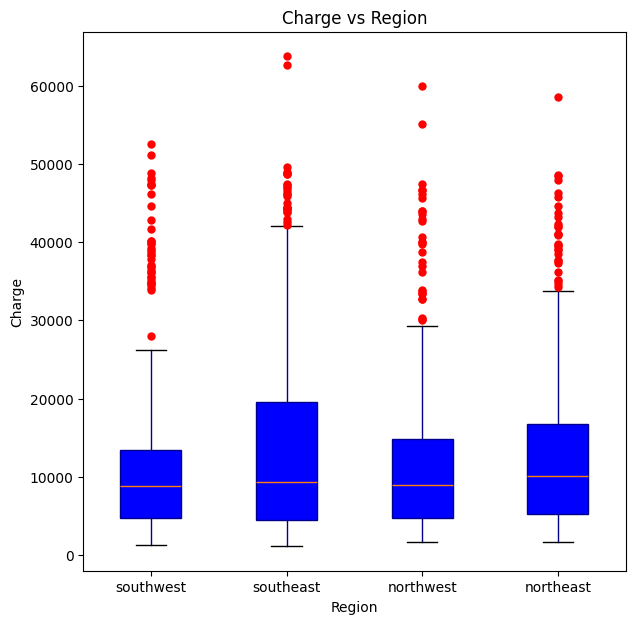

In [523]:
regions = data_frame['region'].unique()
charges_by_region = [data_frame[data_frame['region'] == region]['charges'] for region in regions]

plt.figure(figsize=(7, 7))
plt.xlabel("Region")
plt.ylabel("Charge")
plt.title("Charge vs Region")
plt.boxplot(charges_by_region, tick_labels=regions, patch_artist=True,
            boxprops=dict(facecolor='blue', color='darkblue'),
            whiskerprops=dict(color='darkblue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5, markeredgecolor="red"))

plt.show()

#### Looking to the boxplot number of children is not one of the major factors affecting charges. There aren't visible correlation.

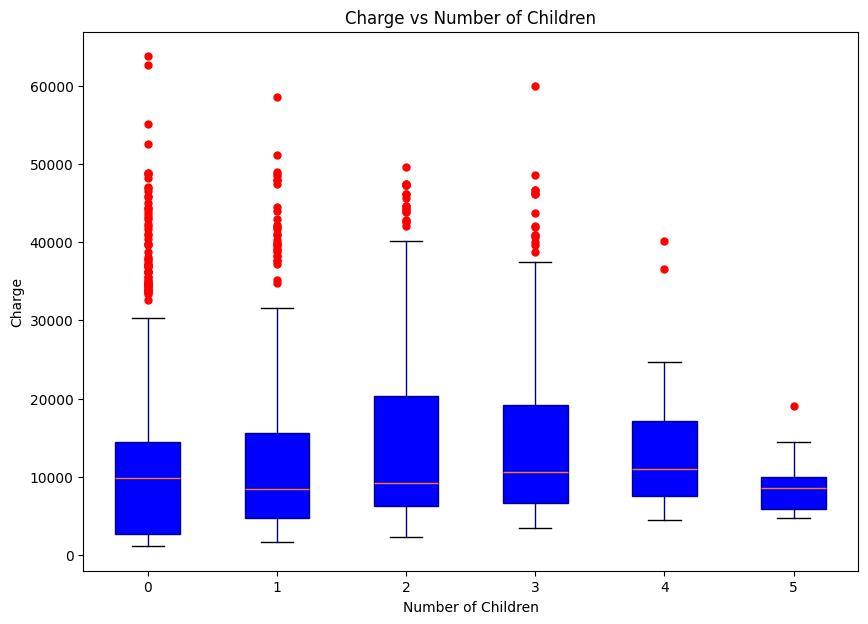

In [524]:
children_counts = data_frame['children'].sort_values().unique()
charges_by_children_count = [data_frame[data_frame['children'] == count]['charges'] for count in children_counts]

plt.figure(figsize=(10, 7))
plt.xlabel("Number of Children")
plt.ylabel("Charge")
plt.title("Charge vs Number of Children")
plt.boxplot(charges_by_children_count, tick_labels=children_counts, patch_artist=True,
            boxprops=dict(facecolor='blue', color='darkblue'),
            whiskerprops=dict(color='darkblue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5, markeredgecolor="red"))

plt.show()

#### The linear correlation between charges and ages are visible without discrimination for any charge levels. Charges are increasing with increasing ages. Makes sense as health issues increases while getting old.

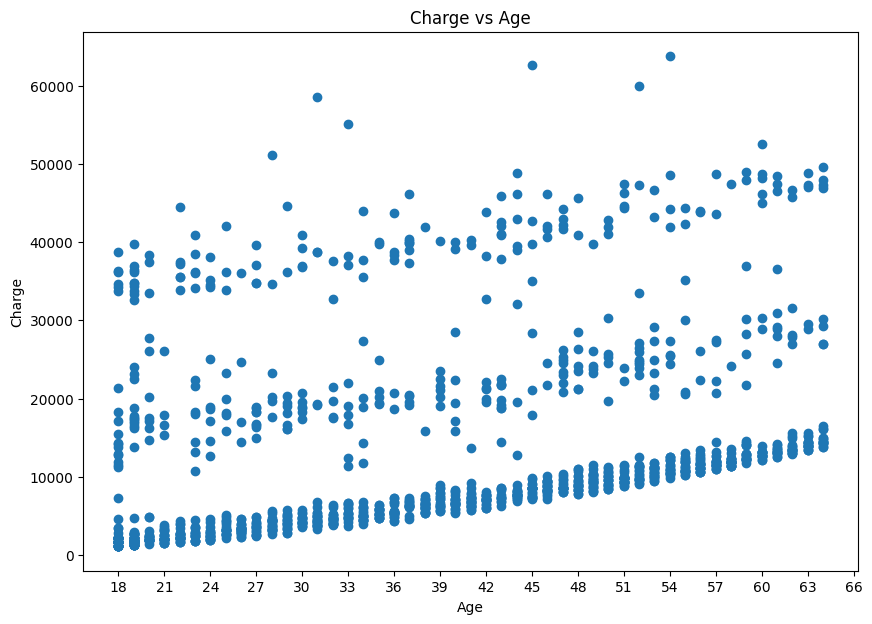

In [525]:
plt.figure(figsize=(10, 7))
plt.xlabel("Age")
plt.ylabel("Charge")
plt.title("Charge vs Age")
plt.scatter(x=data_frame['age'], y=data_frame['charges'])
plt.xticks(range(min_age, max_age + 4, 3))

plt.show()

#### Looking to the scatter plot, BMI is not one of the major factors affecting charges. However we might say the ones pay most are clustered around 34 and ones pay middle values are clustered around 25. 

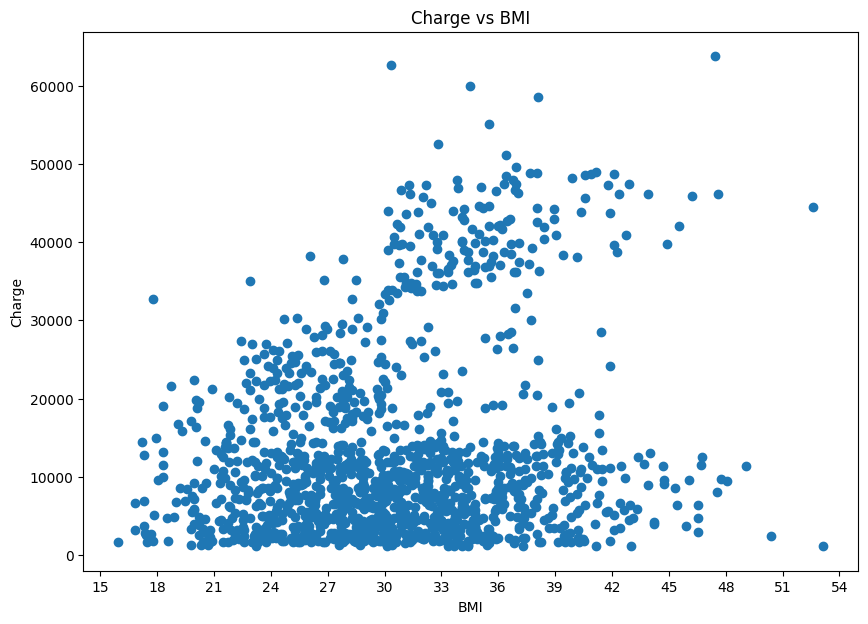

In [526]:
plt.figure(figsize=(10, 7))
plt.xlabel("BMI")
plt.ylabel("Charge")
plt.title("Charge vs BMI")
plt.scatter(x=data_frame['bmi'], y=data_frame['charges'])
plt.xticks(range(int(min_bmi), int(max_bmi) + 4, 3))

plt.show()

#### Heatmap results are not different from our comments above, but for BMI vs Charges, there is a stronger (Still weak as a correlation) correlation than we seen in the graph.

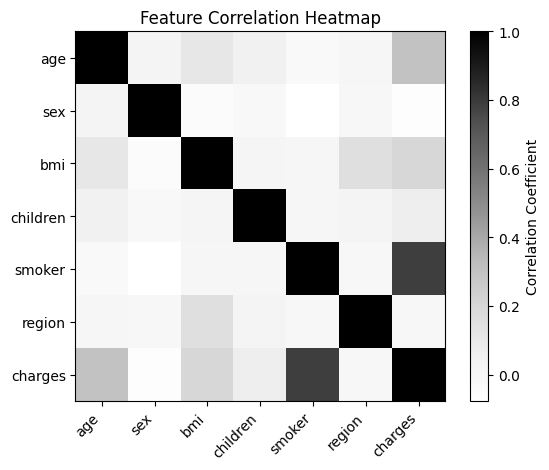

In [527]:
df_numeric = data_frame.copy()

df_numeric['sex'] = df_numeric['sex'].map({'male': 0, 'female': 1})
df_numeric['smoker'] = df_numeric['smoker'].map({'no': 0, 'yes': 1})
df_numeric['region'] = df_numeric['region'].astype('category').cat.codes  # Convert to numeric codes

correlation_matrix = df_numeric.corr()

plt.figure()
plt.imshow(correlation_matrix, cmap='Greys', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Feature Correlation Heatmap")

plt.show()


## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

#### Observations from the histograms above:
#### Age: Distribution appears uniform, without obvious outliers.
#### BMI: Mostly normal distribution but with a few potential outliers on the higher end.
#### Children: A skewed distribution with a few high values (e.g., more than 4 children).
#### Charges: Highly right-skewed, with potential outliers at the upper end.

#### Since this method handles skewed distributions well, while also not distorting the distribution of attributes, we can use the IQR method to identify outliers.

#### Note: Using frequency method for categorical variables, there aren't any outliers in categorical data.

#### Let's define a function for simplicity

In [528]:
def identify_outliers_iqr(data_frame, column):
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_df = data_frame[((data_frame[column] < lower_bound) | (data_frame[column] > upper_bound))]

    return outliers_df

In [529]:
#Outliers are all greater outliers.
charge_outliers = identify_outliers_iqr(data_frame, "charges")
print("min:", charge_outliers["charges"].min(), "max:", charge_outliers["charges"].max())
charge_outliers.sort_values(by="charges")

min: 34617.84065 max: 63770.42801


,age,sex,bmi,children,smoker,region,charges
623,18,male,33.535,0,yes,northeast,34617.84065
1078,28,male,31.680,0,yes,southeast,34672.14720
223,19,male,34.800,0,yes,southwest,34779.61500
689,27,male,31.130,1,yes,southeast,34806.46770
1291,19,male,34.900,0,yes,southwest,34828.65400
...,...,...,...,...,...,...,...
819,33,female,35.530,0,yes,northwest,55135.40209
577,31,female,38.095,1,yes,northeast,58571.07448
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [530]:
#There aren't any age outlier as expected
age_outliers = identify_outliers_iqr(data_frame, "age")
age_outliers.sort_values(by="age")

,age,sex,bmi,children,smoker,region,charges


In [531]:
#Families with # children 4 and 5, stayed in IQR, they are not outliers.
children_outliers = identify_outliers_iqr(data_frame, "children")
children_outliers.sort_values(by="children")

,age,sex,bmi,children,smoker,region,charges


In [532]:
#Outliers are all greater outliers.
bmi_outliers = identify_outliers_iqr(data_frame, "bmi")
print("min:", bmi_outliers["bmi"].min(), "max:", bmi_outliers["bmi"].max())
bmi_outliers.sort_values(by="bmi")

min: 47.41 max: 53.13


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801
401,47,male,47.52,1,no,southeast,8083.91980
860,37,female,47.60,2,yes,southwest,46113.51100
1088,52,male,47.74,1,no,southeast,9748.91060
286,46,female,48.07,2,no,northeast,9432.92530
116,58,male,49.06,0,no,southeast,11381.32540
847,23,male,50.38,1,no,southeast,2438.05520
1047,22,male,52.58,1,yes,southeast,44501.39820
1317,18,male,53.13,0,no,southeast,1163.46270


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

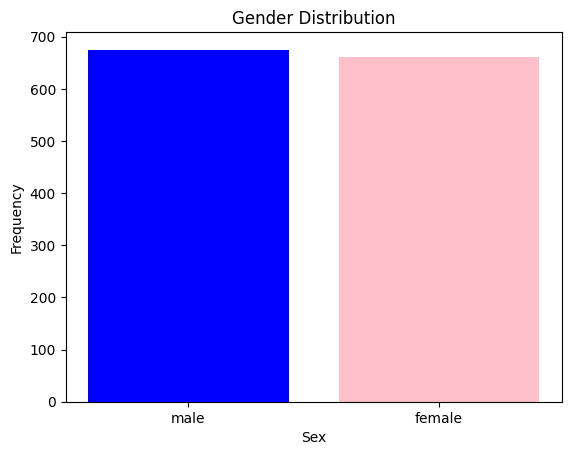

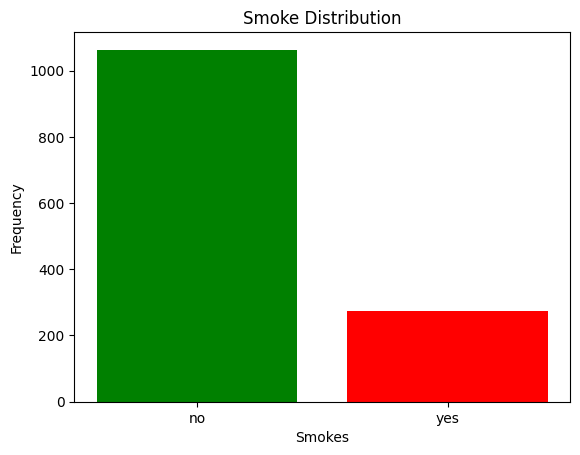

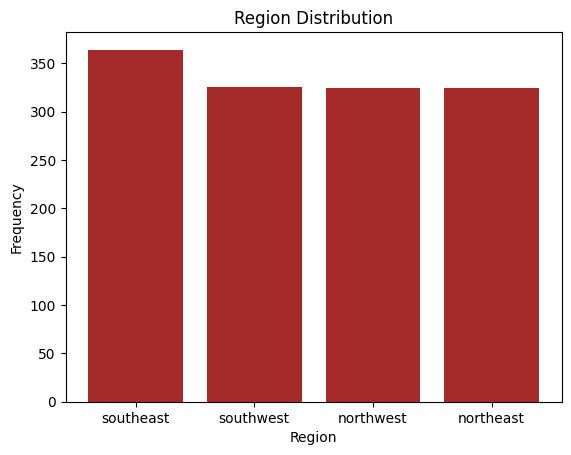

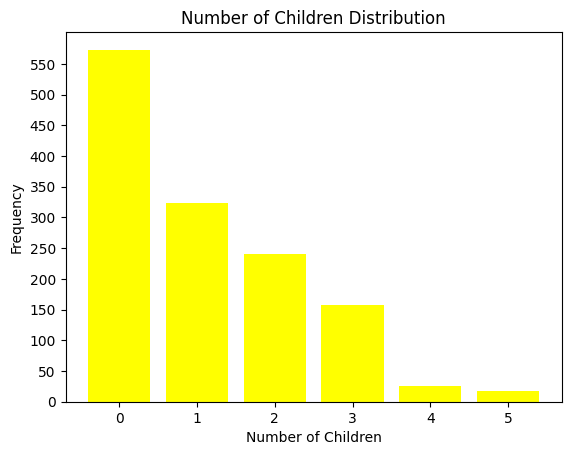

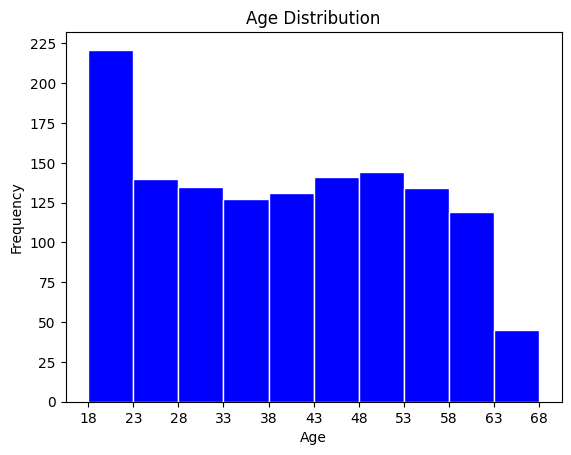

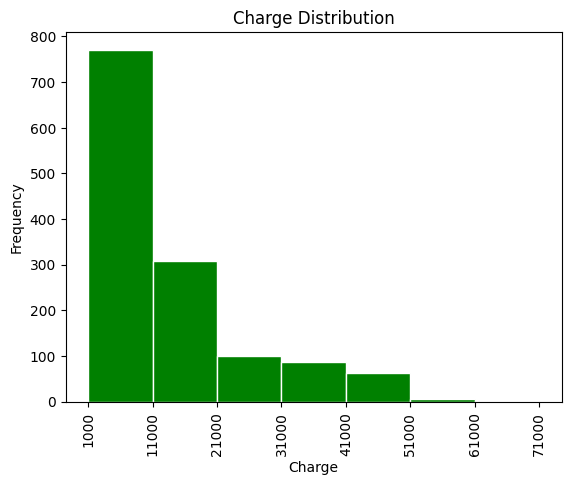

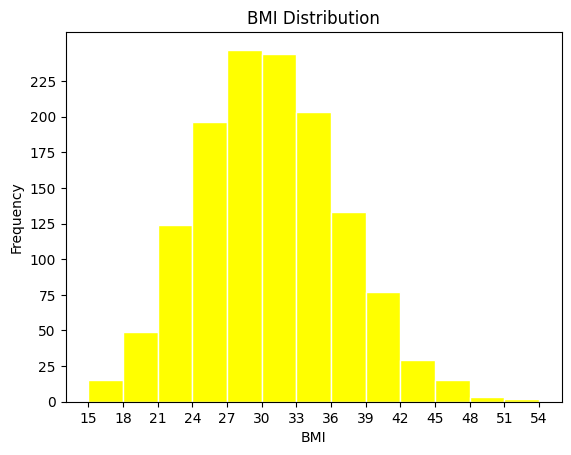

In [533]:
#Let's define a function to visualize distribution and avoid code duplicates.
def visualize_charge_and_bmi(data_frame):
    plt.figure()
    plt.xlabel("Sex")
    plt.ylabel("Frequency")
    plt.title("Gender Distribution")
    plt.bar(x=data_frame["sex"].value_counts().index, height=data_frame["sex"].value_counts().values,
            color=['blue', 'pink'])
    plt.show()
    
    plt.figure()
    plt.xlabel("Smokes")
    plt.ylabel("Frequency")
    plt.title("Smoke Distribution")
    plt.bar(x=data_frame["smoker"].value_counts().index, height=data_frame["smoker"].value_counts().values,
            color=['green', 'red'])
    
    plt.figure()
    plt.xlabel("Region")
    plt.ylabel("Frequency")
    plt.title("Region Distribution")
    plt.bar(x=data_frame["region"].value_counts().index, height=data_frame["region"].value_counts().values, color="brown")
    
    plt.figure()
    plt.xlabel("Number of Children")
    plt.ylabel("Frequency")
    plt.title("Number of Children Distribution")
    plt.bar(x=data_frame["children"].value_counts().index, height=data_frame["children"].value_counts().values,
            color="yellow")
    plt.yticks(range(0, 600, 50))
    plt.show()
    
    plt.figure()
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title("Age Distribution")
    bins = range(min_age, max_age + 6, 5)
    plt.hist(data_frame["age"], bins=bins, color="blue", edgecolor="white")
    plt.xticks(bins)
    plt.yticks(range(0, 250, 25))
    plt.show()
    
    plt.figure()
    plt.xlabel("Charge")
    plt.ylabel("Frequency")
    plt.title("Charge Distribution") 
    bins = range(int(min_charge) // 1000 * 1000, int(max_charge) + 10001, 10000)
    plt.hist(data_frame["charges"], bins=bins, color="green", edgecolor="white")
    plt.xticks(bins, rotation=90)
    plt.show()
    
    plt.figure()
    plt.xlabel("BMI")
    plt.ylabel("Frequency")
    plt.title("BMI Distribution")
    bins = range(int(min_bmi), int(max_bmi) + 4, 3)
    plt.hist(data_frame["bmi"], bins=bins, color="yellow", edgecolor="white")
    plt.yticks(range(0, 250, 25))
    plt.xticks(bins)
    plt.show()
    
visualize_charge_and_bmi(data_frame) #Original dataframe

In [534]:
def remove_outliers(data_frame, columns):
    """
    Function to remove outliers from given dataset. Outliers are found using IQR method.     
    :param data_frame: Dataframe to remove outliers from
    :param column: Dataframe column to remove outliers from
    :return: Dataframe without outliers
    """
    
    return_df = data_frame.copy()
    for column in columns:
        Q1 = data_frame[column].quantile(0.25)
        Q3 = data_frame[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return_df = return_df[((return_df[column] >= lower_bound) & (return_df[column] <= upper_bound))]
        
    return return_df

#### After removing outliers, even the columns without outliers are affected. For instance, smoker count is decreased remarkably since there is a correlation between the columns 'smoker' and 'charges'. These changes may cause the sample not to reflect the population anymore and may lead to incorrect results in the research.

145 records are deleted.


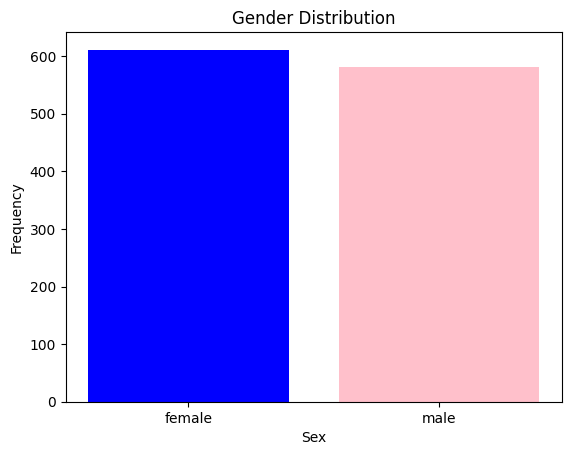

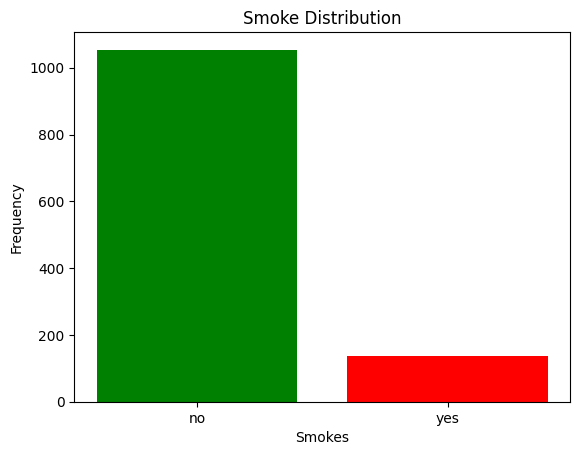

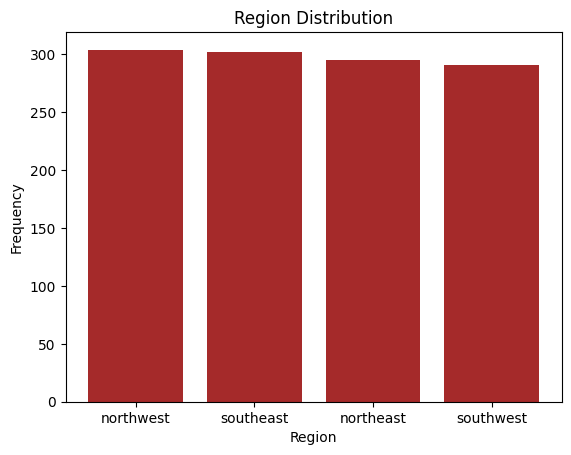

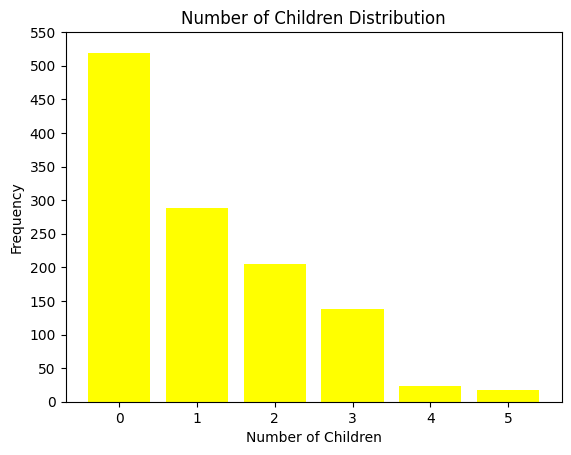

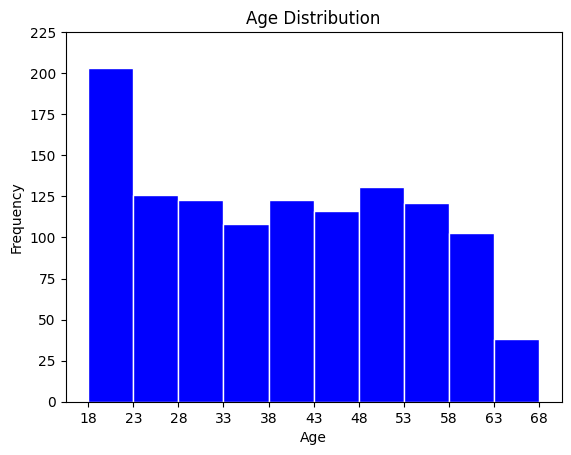

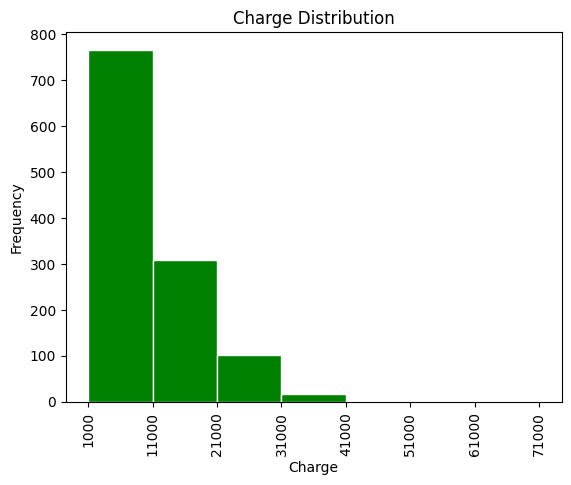

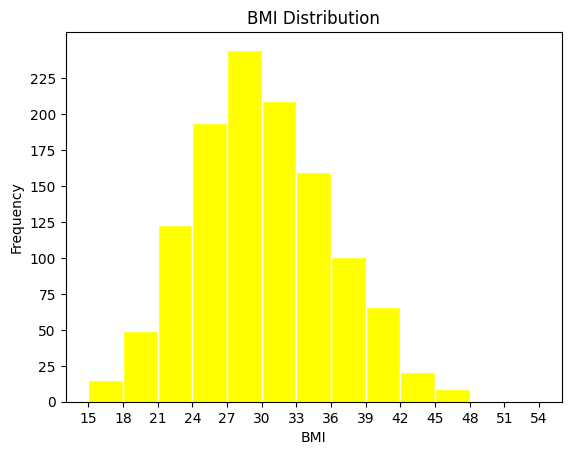

In [535]:
df_without_outliers = remove_outliers(data_frame, ["charges", "bmi"])
print(f"{len(data_frame) - len(df_without_outliers)} records are deleted.")
visualize_charge_and_bmi(df_without_outliers)

#### The distribution of fields without outliers kept same as in the original dataframe because we did not change any value. For the fields with outliers; in distribution, the frequency of the bin including mean value is increased by the amount of the outliers in this field.

#### Note: According to the AIN212 slides mean is calculated without outliers. (It says this method keeps mean unchanged and if I calculate outliers included, mean won't be same when outliers' value changed with mean)

#### Note: If we were calculated mean dataset outliers included; as mean is sensitive to outliers, the mean value would still be close to the outliers and cause not to remove outlier effect completely.

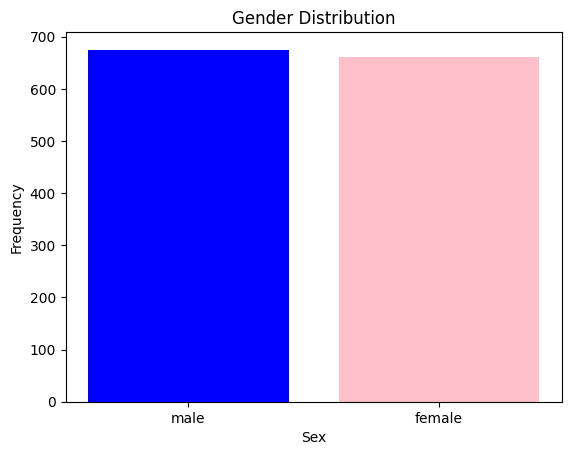

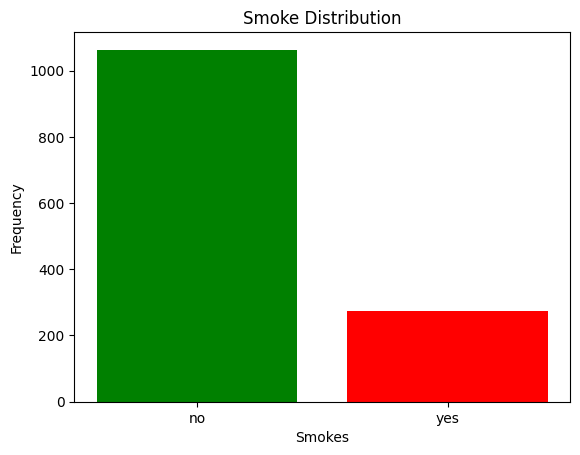

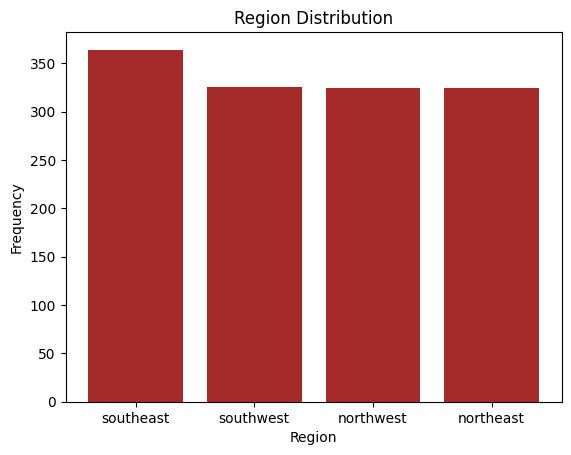

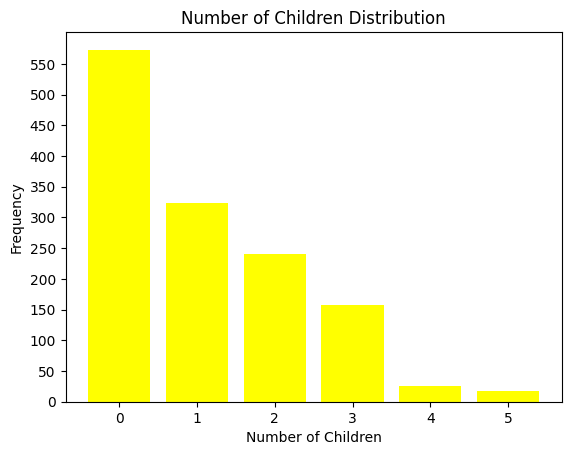

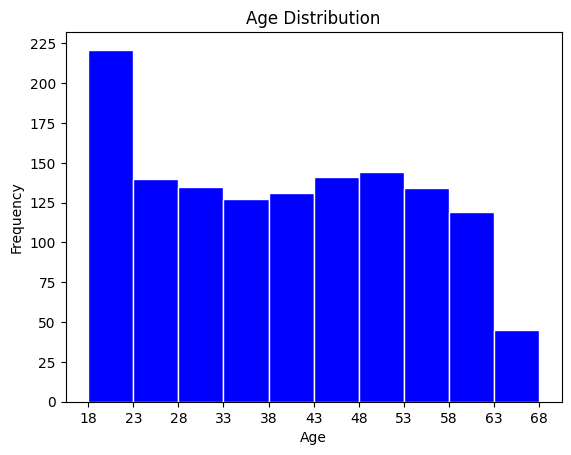

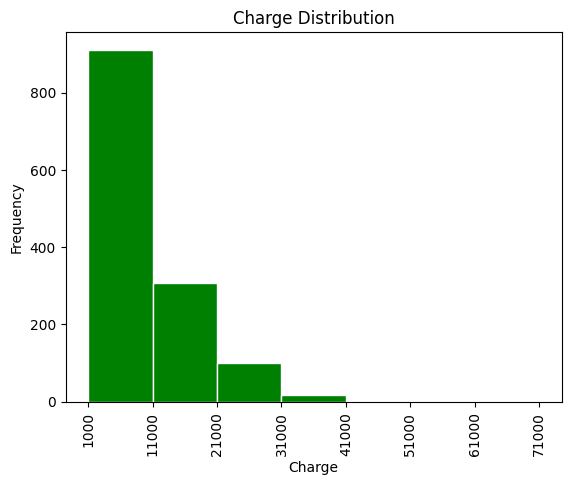

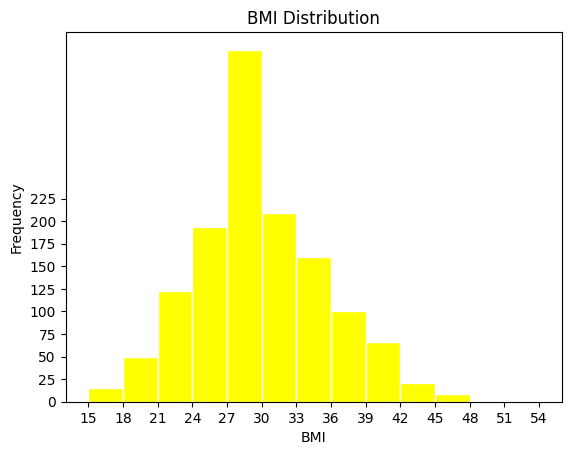

In [536]:
def mean_imputation(df_without_outliers, outliers_df, outlier_columns):
    outliers_df = outliers_df.copy()
    
    for col in outlier_columns:
        mean_value = df_without_outliers[col].mean() 
        outliers_df[col] = mean_value 

    merged_df = pd.concat([df_without_outliers, outliers_df])
    return merged_df

total_outliers = pd.concat([bmi_outliers, charge_outliers])
total_outliers.drop_duplicates(inplace=True)

mean_imputation_df = mean_imputation(df_without_outliers, total_outliers, ["bmi", "charges"])
visualize_charge_and_bmi(mean_imputation_df)

#### The distribution of fields without outliers kept same as in the original dataframe because we did not change any value. For the fields with outliers; in distribution, the frequency of the bin including median value is increased by the amount of the outliers in this field.

#### Note: Since mean is sensitive to outliers, the mean value would still be close to the outliers and cause not to remove outlier effect completely. In conclusion as a prediction median imputation might work better.

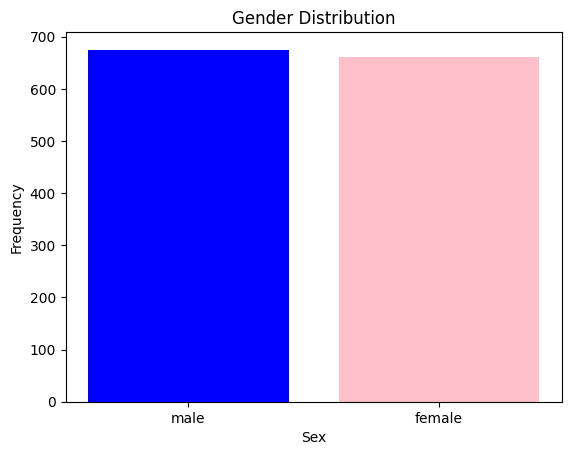

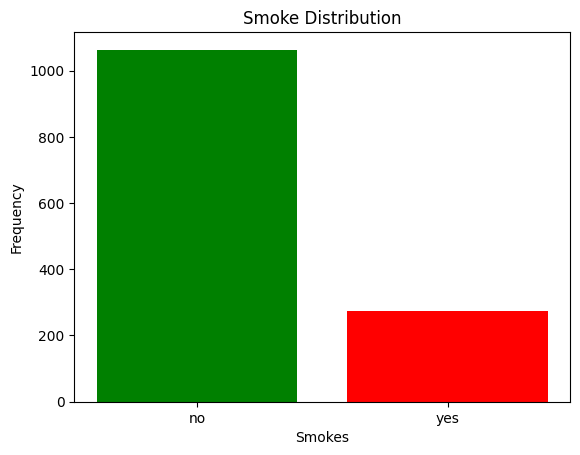

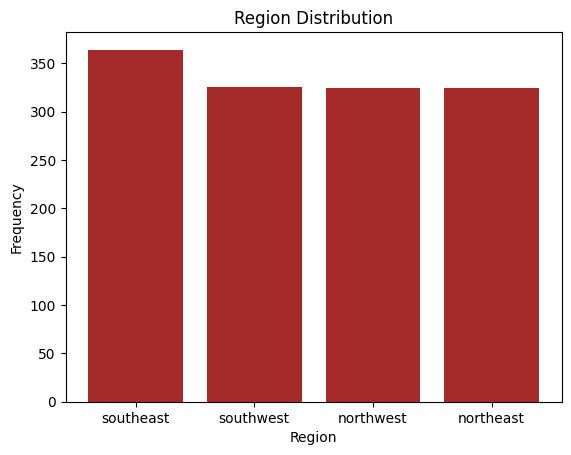

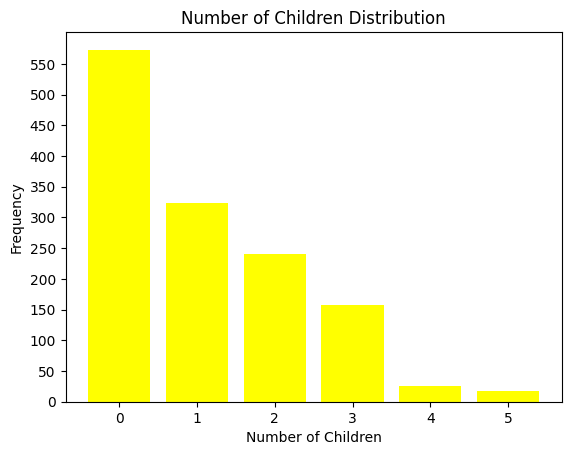

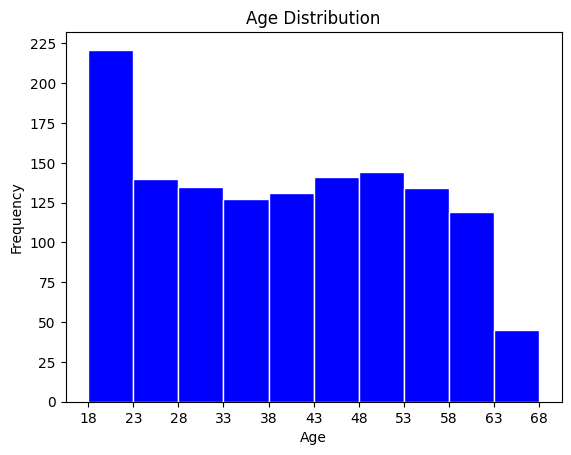

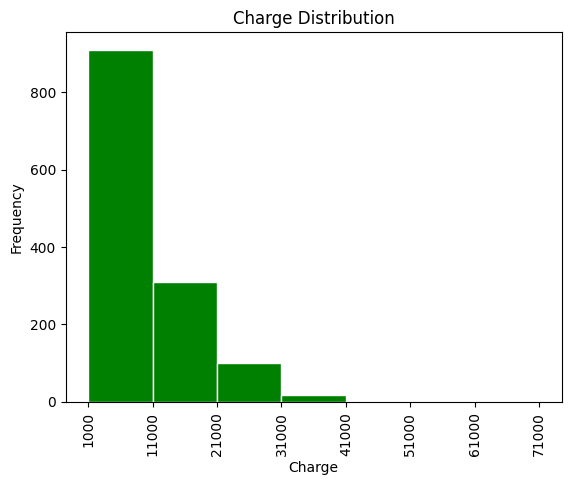

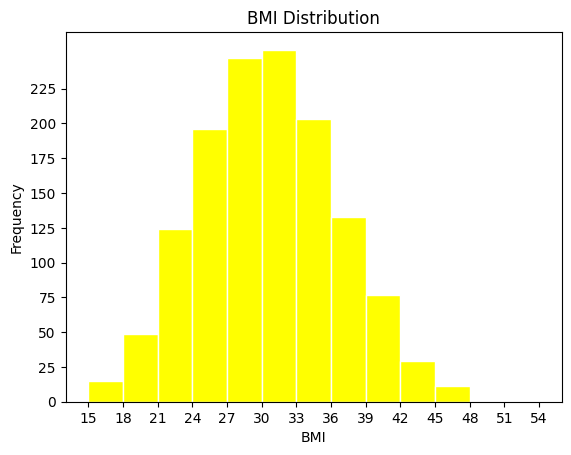

In [537]:
def impute_outliers_with_median(data_frame, column):
    data_frame = data_frame.copy()
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median = data_frame[column].median()
    
    data_frame[column] = np.where((data_frame[column] < lower_bound) | (data_frame[column] > upper_bound), median, data_frame[column])
    return data_frame

median_imputation_df = impute_outliers_with_median(data_frame, ["bmi", "charges"])
visualize_charge_and_bmi(median_imputation_df)

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [538]:
encoded_original_df = pd.get_dummies(data_frame)
encoded_original_df = encoded_original_df.astype(int) #Use 1 and 0 instead of boolean

encoded_without_outlier_df = pd.get_dummies(df_without_outliers)
encoded_without_outlier_df = encoded_without_outlier_df.astype(int)

encoded_mean_imputation_df = pd.get_dummies(mean_imputation_df)
encoded_mean_imputation_df = encoded_mean_imputation_df.astype(int)

encoded_median_imputation_df = pd.get_dummies(median_imputation_df)
encoded_median_imputation_df = encoded_median_imputation_df.astype(int)

## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [539]:
def shuffle_df(data_frame, random_state):
    np.random.seed(random_state)
    
    shuffled_indexes = np.random.permutation(data_frame.index)
    return data_frame.loc[shuffled_indexes]
    
def test_train_split(data_frame, random_state):
    data_frame = shuffle_df(data_frame, random_state)
    test_len = int(0.3 * len(data_frame))
    test_df = data_frame[:test_len]
    train_df = data_frame[test_len:]
    return test_df, train_df

original_test_df, original_train_df = test_train_split(encoded_original_df, 12)
without_outlier_test_df, without_outlier_train_df = test_train_split(encoded_without_outlier_df, 12)
mean_test_df, mean_train_df = test_train_split(encoded_mean_imputation_df, 12)
median_test_df, median_train_df = test_train_split(encoded_median_imputation_df, 12)

# **PART- 2: REGRESSION (50 Pts)**
* Target value: charges
* Predictors: The rest

* ***You can use scikit-learn***




## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data.
    * Predict the test set and calculate the MSE value for each k.
    * Plot the MSE vs k curve to decide on the optimal k.
    * Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?


In [540]:
#Let's first define functions to avoid code duplicates
def apply_kNN_regression(test_df, train_df, k_range=range(1, 31)):
    X_test, y_test = prepare_data(test_df)
    X_train, y_train = prepare_data(train_df)
    
    mse_values = {} 
    r2_values = {}  
    
    for k in k_range:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)  
        
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mse_values[k] = mse
        r2_values[k] = r2
        
    return r2_values, mse_values

def prepare_data(data_frame):
    X = data_frame.drop("charges", axis=1)  # Features
    y = data_frame["charges"]  # Target variable
    return X, y


def find_optimal_k(mse_values):
    optimal_k = min(mse_values, key=mse_values.get)
    return optimal_k

def plot_k_vs_mse(mse_values, k_range=range(1, 31)):
    mse_list = []
    for k in k_range:
        mse_list.append(mse_values[k])
    plt.figure(figsize=(12,6))
    plt.plot(k_range, mse_list, marker='o')
    plt.title("MSE vs K (kNN Regression)")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
    

r2_original, mse_original = apply_kNN_regression(original_test_df, original_train_df)

r2_outliers_removed, mse_outliers_removed = apply_kNN_regression(without_outlier_test_df, without_outlier_train_df)

r2_mean_imputed, mse_mean_imputed = apply_kNN_regression(mean_test_df, mean_train_df)

r2_median_imputed, mse_median_imputed = apply_kNN_regression(median_test_df, median_train_df)



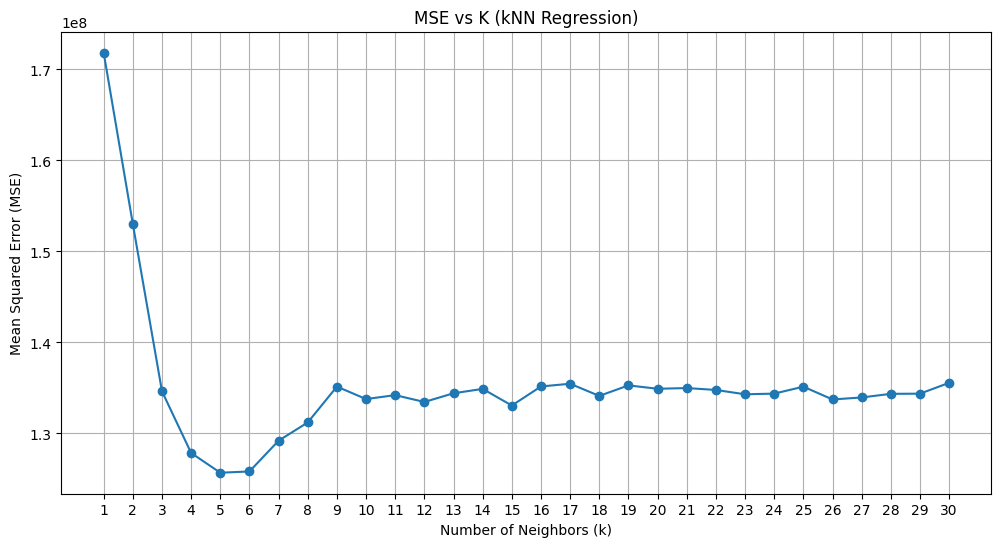

Optimal k: 5 and R-squared value of this k: 0.18708174022737623
Min MSE value: 12.57e7


In [541]:
plot_k_vs_mse(mse_original)
optimal_k = find_optimal_k(mse_original)
print(f"Optimal k: {optimal_k} and R-squared value of this k: {r2_original[optimal_k]}")
print("Min MSE value: {:.2f}e7".format(mse_original[optimal_k] * 1e-7))

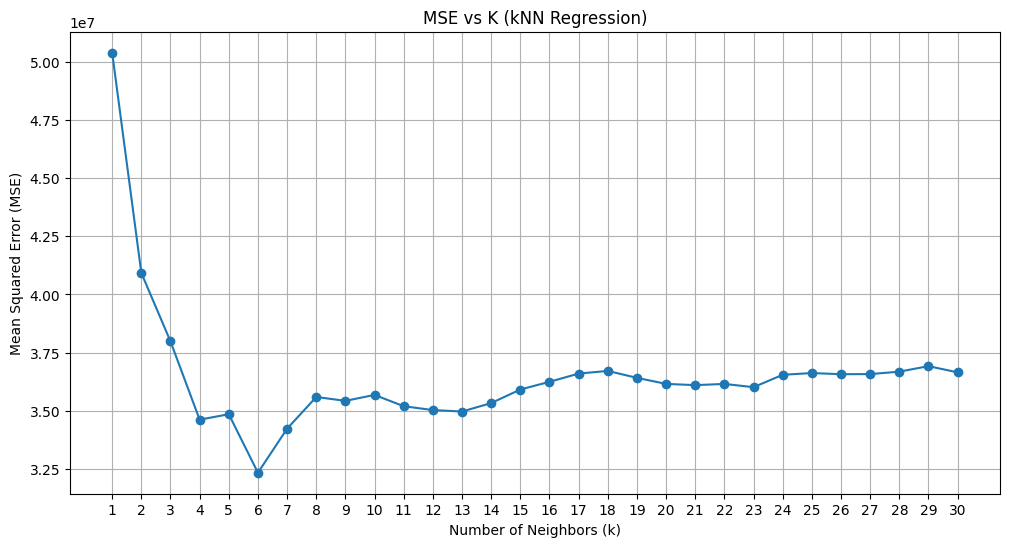

Optimal k: 6 and R-squared value of this k: 0.37854940797604075
Min MSE value: 3.23e7


In [542]:
plot_k_vs_mse(mse_outliers_removed)
optimal_k = find_optimal_k(mse_outliers_removed)
print(f"Optimal k: {optimal_k} and R-squared value of this k: {r2_outliers_removed[optimal_k]}")
print("Min MSE value: {:.2f}e7".format(mse_outliers_removed[optimal_k] * 1e-7))

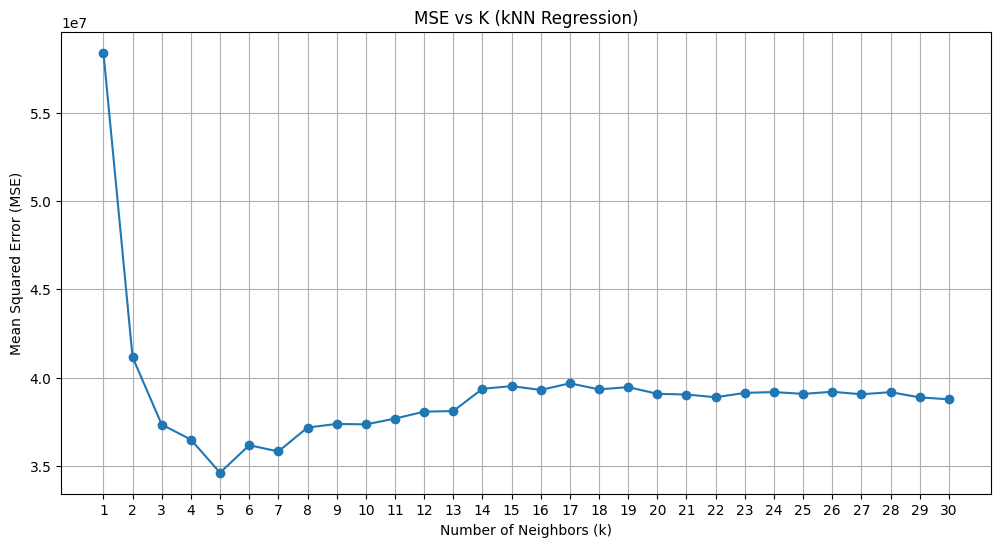

Optimal k: 5 and R-squared value of this k: 0.35421692446405484
Min MSE value: 3.46e7


In [543]:
plot_k_vs_mse(mse_mean_imputed)
optimal_k = find_optimal_k(mse_mean_imputed)
print(f"Optimal k: {optimal_k} and R-squared value of this k: {r2_mean_imputed[optimal_k]}")
print("Min MSE value: {:.2f}e7".format(mse_mean_imputed[optimal_k] * 1e-7))

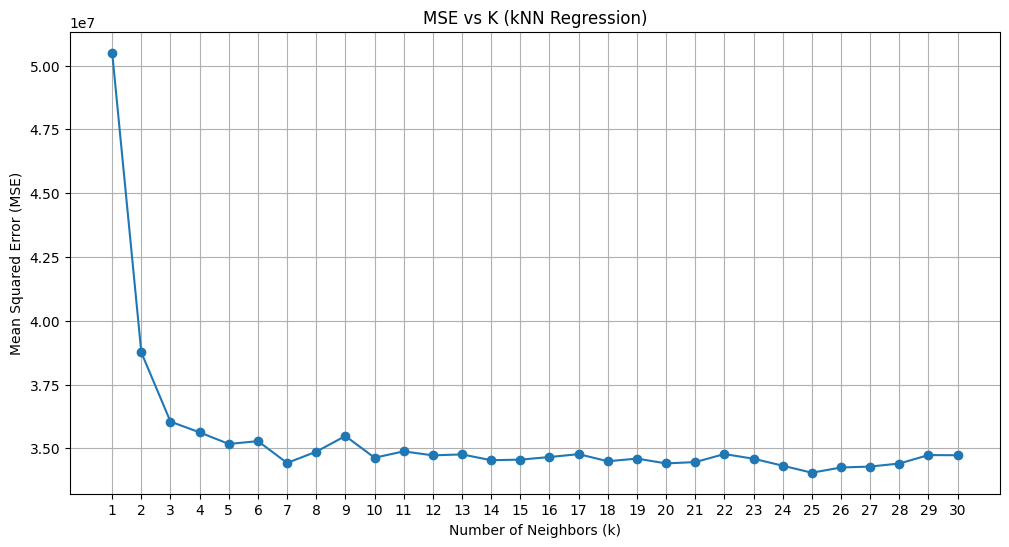

Optimal k: 25 and R-squared value of this k: 0.26652579956018485
Min MSE value: 3.40e7


In [544]:
plot_k_vs_mse(mse_median_imputed)
optimal_k = find_optimal_k(mse_median_imputed)
print(f"Optimal k: {optimal_k} and R-squared value of this k: {r2_median_imputed[optimal_k]}")
print("Min MSE value: {:.2f}e7".format(mse_median_imputed[optimal_k] * 1e-7))

### Not handling outliers gave the worst results as expected. Different methods to handle outliers gave similar results and made result approximately 3.5 times better. Among these methods we get best MSE with removing outliers. I have mentioned above that using median imputation might be better than mean imputation because of outliers and results are slightly better for median as I expect. I actually would expect also getting better result from removing outliers for median imputation method, but the results are differed. However when we look at the curves; median imputation method's MSE values are getting better while k is increasing and removing outliers method's MSE values are not getting better, but getting worse while k is increasing. These trends may implicate that there can be a k value bound where median imputation method getting better results than removing method.

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.

In [545]:
def linear_regression_mse(train_df, test_df):
    X_test, y_test = prepare_data(test_df)
    X_train, y_train = prepare_data(train_df)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    return mse


linear_mse_original = linear_regression_mse(original_train_df, original_test_df)
linear_mse_without_outliers = linear_regression_mse(without_outlier_train_df, without_outlier_test_df)
linear_mse_mean_imputed = linear_regression_mse(mean_train_df, mean_test_df)
linear_mse_median_imputed = linear_regression_mse(median_train_df, median_test_df)

print("MSE for Original Data: {:.2f}e7".format(linear_mse_original* 1e-7))
print("MSE for Data without Outliers: {:.2f}e7".format(linear_mse_without_outliers* 1e-7))
print("MSE for Mean Imputation Data: {:.2f}e7".format(linear_mse_mean_imputed* 1e-7))
print("MSE for Median Imputation Data: {:.2f}e7".format(linear_mse_median_imputed* 1e-7))


MSE for Original Data: 4.62e7
MSE for Data without Outliers: 2.12e7
MSE for Mean Imputation Data: 2.94e7
MSE for Median Imputation Data: 2.96e7


## 2.3. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.).

* Discuss the strengths and limitations of each model based on your results

#### MSE Results for Linear Regression:
MSE for Original Data: 4.62e7
MSE for Data without Outliers: 2.12e7
MSE for Mean Imputation Data: 2.93e7
MSE for Median Imputation Data: 2.96e7

<br>
<br>

#### Best MSE Results for kNN Regression:
Original Data: MSE = 12.57e7
Data without Outliers: MSE = 3.23e7
Mean Imputation Data: MSE = 3.46e7
Median Imputation Data: MSE = 3.40e7

<br>
<br>
<br>

Linear Regression performed better than kNN Regression in terms of MSE across all datasets, especially with the Original Data and Data without Outliers. Removing outliers improves both models, and emphasizes the importance of outlier handling. The effect of imputation methods (mean and median) on MSE is similar, but if we were calculated mean with outliers included, mean method would most probably give worse results.

Linear Regression is efficient and easy to understand, working well when outliers are removed. However, it assumes a linear relationship between variables. On the other hand, kNN Regression can handle non-linear relationships well, but it is computationally heavy and very sensitive to outliers.

Linear Regression is sensitive to outliers, meaning extreme values can affect the model. Thus, removing outliers can improve performance. kNN looks also highly sensitive to outliers because it uses the distance between data points, so outliers can distort these distances and lead to worse results.

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw3.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.